In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import math
import pandas as pd

In [18]:


DRUGBANK_DATABASES:list() = [
    #(index, DB name, db xml file, release month, release year)
    (0,"DB 3.0","database/3.0/drugbank.xml",1,2011),
    (1,"DB 4.1","database/4.1/drugbank.xml",12,2014),
    (2,"DB 4.2","database/4.2/drugbank.xml",2,2015), 
    (3,"DB 4.3","database/4.3/drugbank.xml",2,2016),
    (4,"DB 4.5","database/4.5.0/drugbank.xml",4,2016),
    (5," DB 5.0","database/5.0.0/drugbank.xml",6,2016),
    (6,"DB 5.0.1","database/5.0.1/drugbank.xml",7,2016),
    (7,"DB 5.0.2","database/5.0.2/drugbank.xml",10,2016),
    (8,"DB 5.0.3","database/5.0.3/drugbank.xml",10,2016),
    (9,"DB 5.0.4","database/5.0.4/full_database.xml",1,2017),
    (10,"DB 5.0.5","database/5.0.5/full_database.xml",1,2017),
    (11,"DB 5.0.6","database/5.0.6/full_database.xml",4,2017),
    (12,"DB 5.0.7","database/5.0.7/full_database.xml",7,2017),
    (13,"DB 5.0.8","database/5.0.8/full_database.xml",9,2017),
    (14,"DB 5.0.9","database/5.0.9/full_database.xml",10,2017), 
    (15,"DB 5.0.10","database/5.0.10/full_database.xml",11,2017),
    (16,"DB 5.0.11","database/5.0.11/full_database.xml",12,2017),
    (17,"DB 5.1.0","database/5.1.0/full_database.xml",4,2018),
    (18,"DB 5.1.1","database/5.1.1/full_database.xml",7,2018),
    (19,"DB 5.1.2","database/5.1.2/full_database.xml",12,2018),
    (20,"DB 5.1.3","database/5.1.3/full_database.xml",4,2019),
    (21,"DB 5.1.4","database/5.1.4/full_database.xml",7,2019),
    (22,"DB 5.1.5","database/5.1.5/full_database.xml",1,2020),
    (23,"DB 5.1.6","database/5.1.6/full_database.xml",4,2020),
    (24,"DB 5.1.7","database/5.1.7/full_database.xml",7,2020),
    (25,"DB 5.1.8","database/5.1.8/full_database.xml",1,2021)
]
    
DRUG_AGE_Column:str ='age'     
RESULT_FILE_NAME:str = "clusters"    

In [19]:
def read_csv(database,file):
    values = []
    labels = []
    with open(file, encoding='utf-8-sig') as csv_file:
        reader = csv.DictReader(csv_file, delimiter=',')
        
        for row in reader:
            #print(row['Drug name'], row[DRUG_AGE_Column], row[DB_5_0_Column])
            entry = []
            entry.append(int(row[database+" "+"age"])) 
            buffer_val = row[database]
            if buffer_val == 'N/A' or buffer_val == "#VALUE!":
                entry.append(0)
            else:
                entry.append(int(buffer_val))
            labels.append(row['label'])
            values.append(entry)
    X=np.ndarray((len(values),2), buffer=np.array(values),dtype=int) 
    return X,np.array(labels)

In [20]:
def write_cluster(dataframe, database,cluster_ids_list,X,labels,y_km):
    for cluster_id in cluster_ids_list:
        drugs = list(zip(labels[y_km==cluster_id[1]],X[y_km==cluster_id[1],0],X[y_km==cluster_id[1],1]))
        for item in drugs:
            df.loc[df["label"]==item[0], database+" clusters"] = cluster_id[0]
    #print(df.head())

In [21]:
def print_clusters(database_version,cluster_ids_list,X,labels,y_km):
    """
    This function prints, the drugs from each cluster.
    Input: number of clusters, X-> list of drugs, labels->list of drug labels, y_km
    """
    for cluster_id in cluster_ids_list:
        filename = "clusters/"+RESULT_FILE_NAME+database_version+"_Cluster"+str(cluster_id[0])+".csv"
        with open(filename, mode='w') as clusters_file:
            clusters_write = csv.writer(clusters_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        
            #clusters_write.writerow(['Drug Name'])
            clusters_write.writerow(['Drug Name', 'Age', 'Degree'])        
            drugs = list(zip(labels[y_km==cluster_id[1]],X[y_km==cluster_id[1],0],X[y_km==cluster_id[1],1]))
            for item in drugs:
                #clusters_write.writerow([item[0]])
                clusters_write.writerow([item[0],item[1],item[2]])
                

In [22]:
def get_cluster_order(centroids_x,centroids_y):
    first_cluster = np.argmin(centroids_y)
    second_cluster= 0
    third_cluster = np.argmax(centroids_y)
    if first_cluster == 0:
        if third_cluster == 1:
            second_cluster = 2
        else:
            second_cluster = 1
    elif first_cluster == 1:
        if third_cluster == 2:
            second_cluster = 0
        else:
            second_cluster = 2
    elif first_cluster == 2:
        if third_cluster == 0:
            second_cluster = 1
        else:
            second_cluster = 0
    return first_cluster,second_cluster,third_cluster

DB 3.0


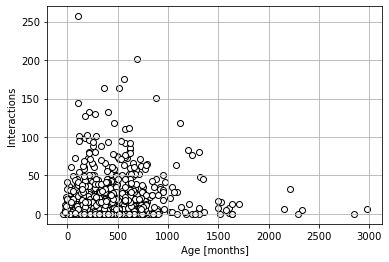

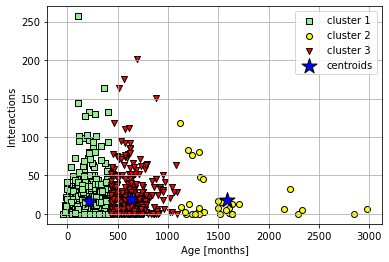

DB 4.1


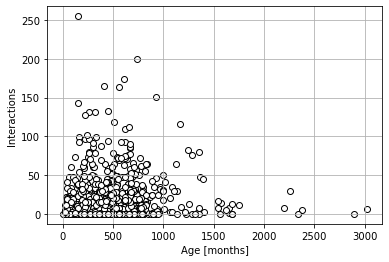

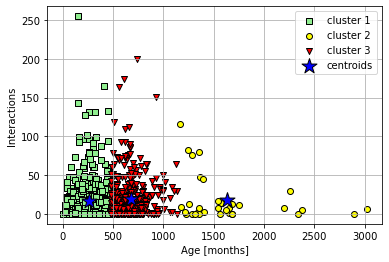

DB 4.2


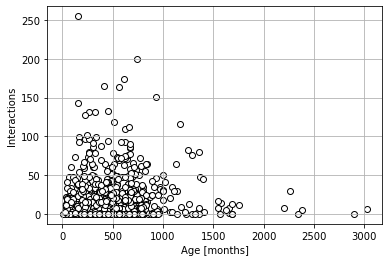

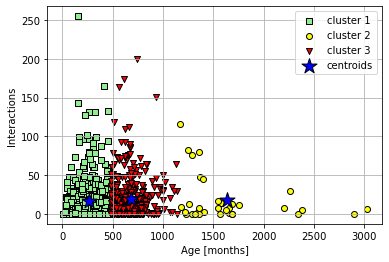

DB 4.3


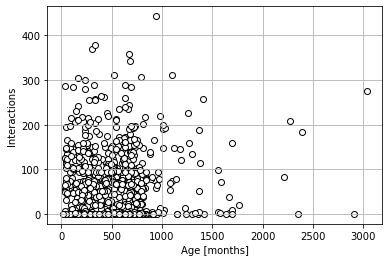

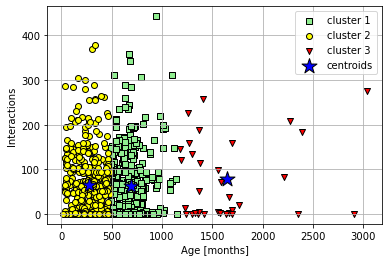

DB 4.5


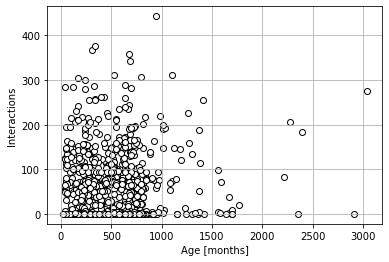

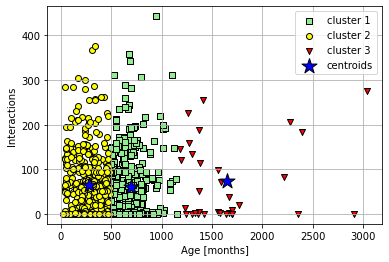

 DB 5.0


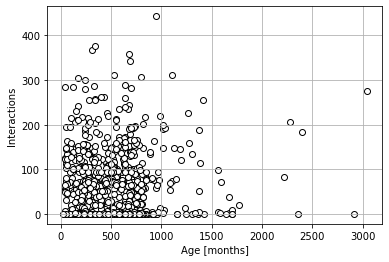

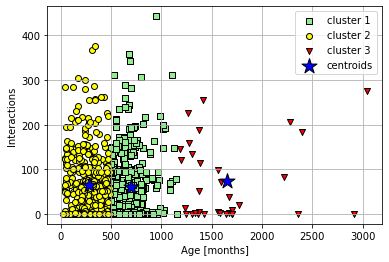

DB 5.0.1


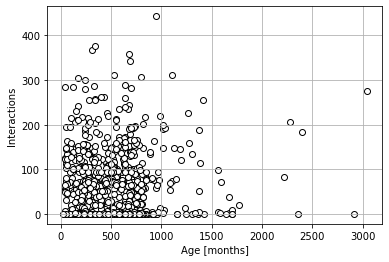

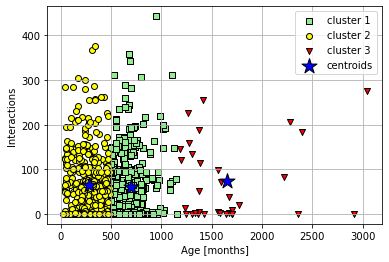

DB 5.0.2


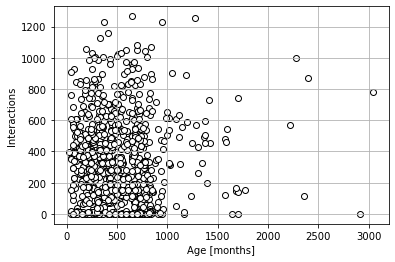

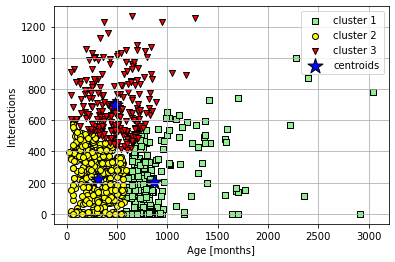

DB 5.0.3


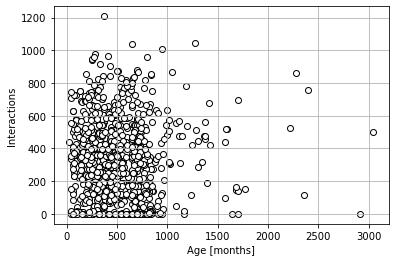

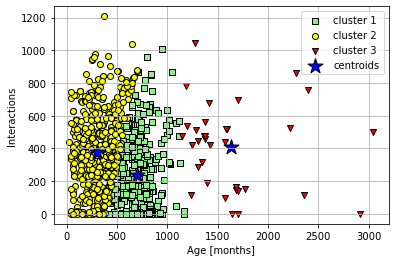

DB 5.0.4


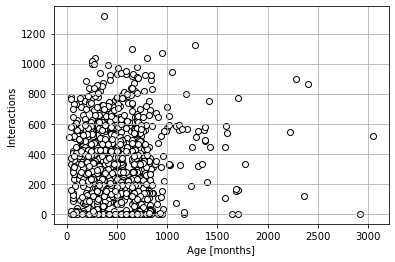

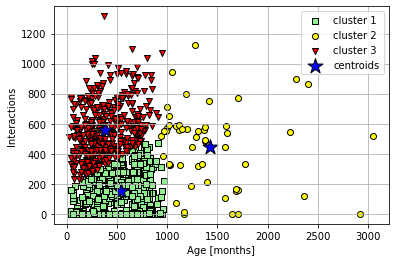

DB 5.0.5


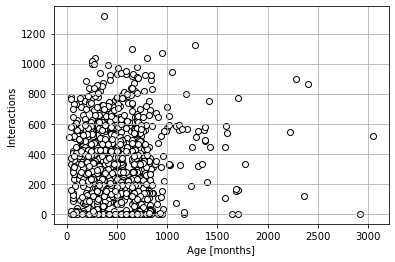

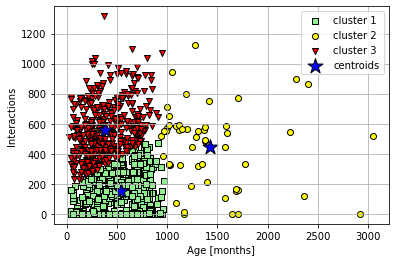

DB 5.0.6


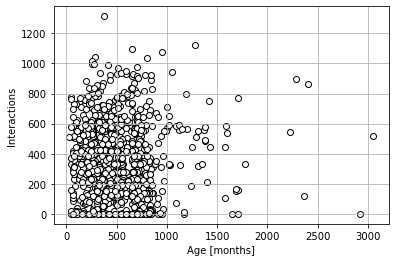

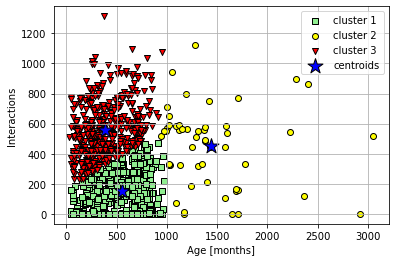

DB 5.0.7


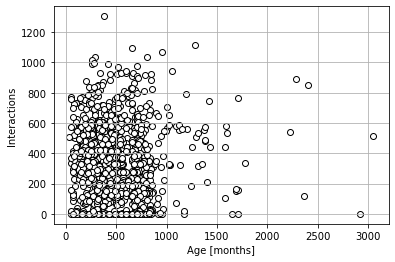

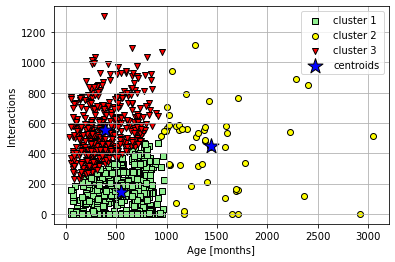

DB 5.0.8


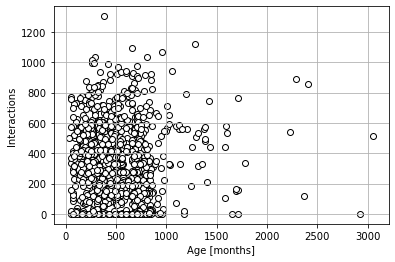

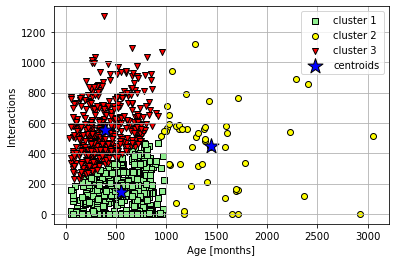

DB 5.0.9


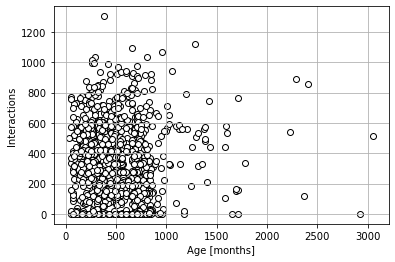

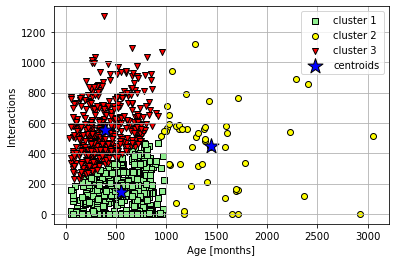

DB 5.0.10


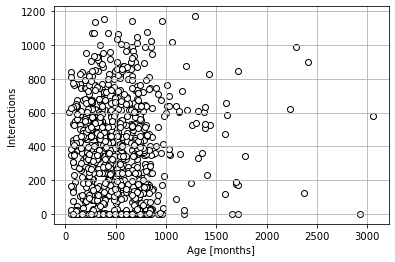

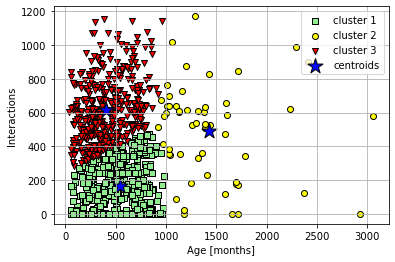

DB 5.0.11


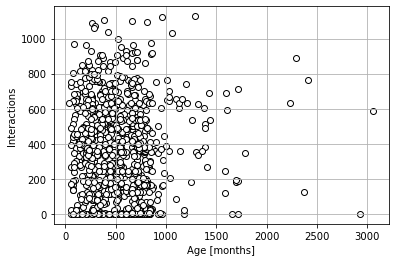

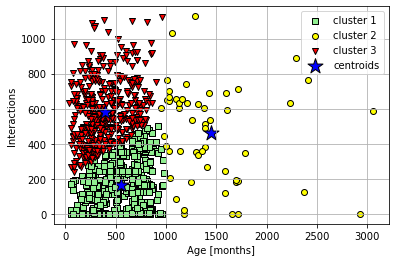

DB 5.1.0


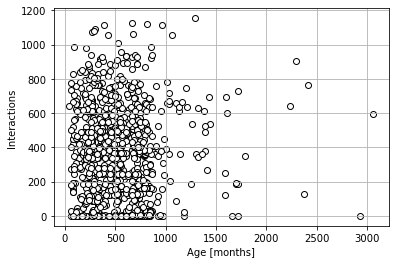

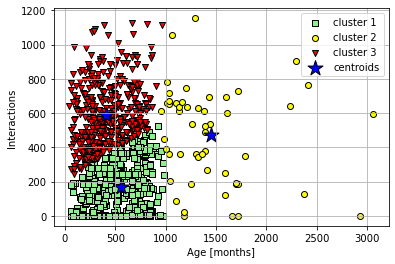

DB 5.1.1


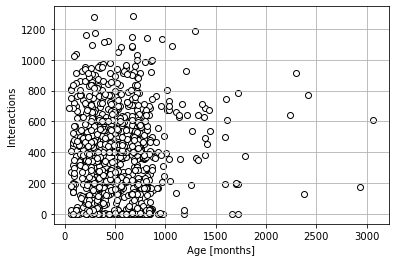

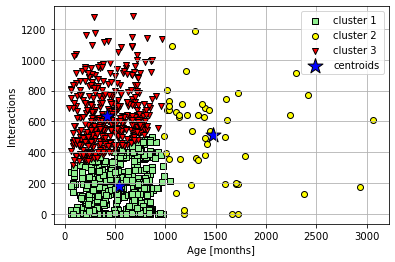

DB 5.1.2


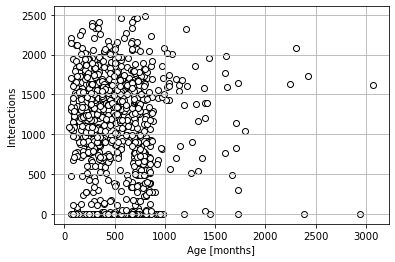

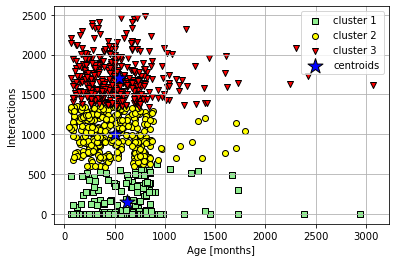

DB 5.1.3


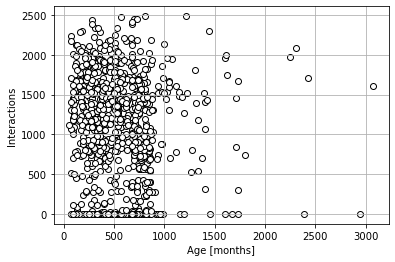

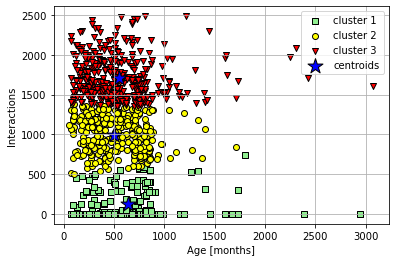

DB 5.1.4


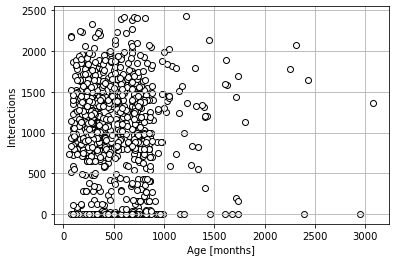

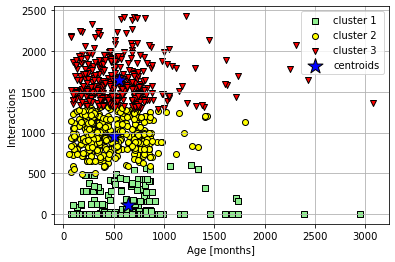

DB 5.1.5


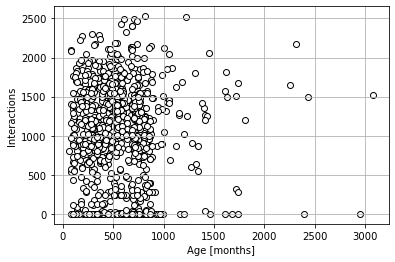

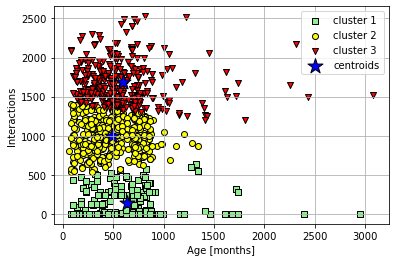

DB 5.1.6


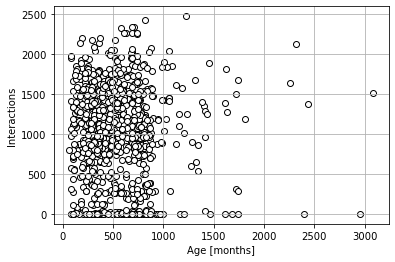

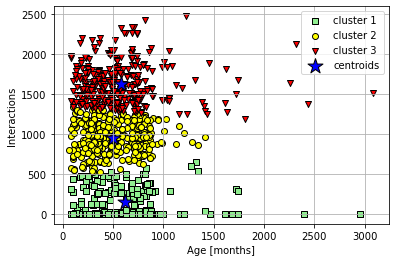

DB 5.1.7


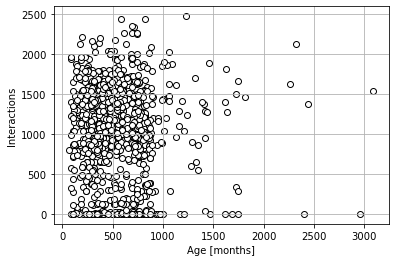

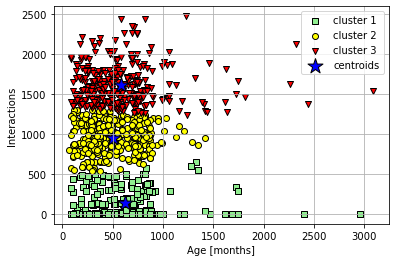

DB 5.1.8


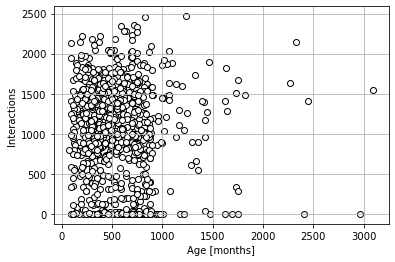

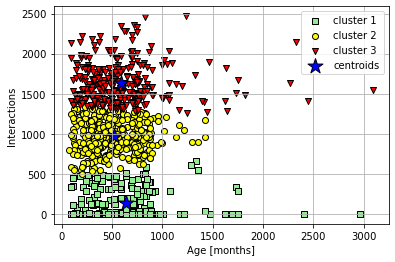

In [23]:
centroid_distance_1_2_list=[]
centroid_distance_2_3_list=[]
df = pd.read_csv('drugs_age_interactions.csv')
for item in DRUGBANK_DATABASES:
    X,drug_labels = read_csv(item[1],'drugs_age_interactions.csv')
    print(item[1])
    plt.scatter(X[:,0],X[:,1], c='white', marker='o', edgecolor='black')
    plt.xlabel("Age [months]")
    plt.ylabel("Interactions")
    plt.grid()
    plt.show()

    km = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)
    cluster_1,cluster_2,cluster_3 = get_cluster_order(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1])
    plt.scatter(X[y_km == cluster_1, 0], X[y_km == cluster_1, 1], c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
    plt.scatter(X[y_km == cluster_2, 0], X[y_km == cluster_2, 1], c='yellow', marker='o', edgecolor='black',label='cluster 2')
    plt.scatter(X[y_km == cluster_3, 0], X[y_km == cluster_3, 1], c='red', marker='v', edgecolor='black',label='cluster 3')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=250, marker='*', c='blue', edgecolor='black',label='centroids')
    plt.legend(scatterpoints=1)
    plt.xlabel("Age [months]")
    plt.ylabel("Interactions")
    plt.grid()
    plt.show()
    distance_1_2 = math.sqrt((km.cluster_centers_[cluster_2, 0]-km.cluster_centers_[cluster_1, 0])**2 + (km.cluster_centers_[cluster_2, 1]-km.cluster_centers_[cluster_1, 1])**2 )
    distance_2_3 = math.sqrt((km.cluster_centers_[cluster_3, 0]-km.cluster_centers_[cluster_2, 0])**2 + (km.cluster_centers_[cluster_3, 1]-km.cluster_centers_[cluster_2, 1])**2 )
    centroid_distance_1_2_list.append(distance_1_2)
    centroid_distance_2_3_list.append(distance_2_3)  
    print_clusters(item[1],[(1,cluster_1),(2,cluster_2),(3,cluster_3)],X,drug_labels,y_km)
    write_cluster(df, item[1],[(1,cluster_1),(2,cluster_2),(3,cluster_3)],X,drug_labels,y_km)

In [24]:
df.to_csv("drugs_age_interactions_clusters.csv", index=False)

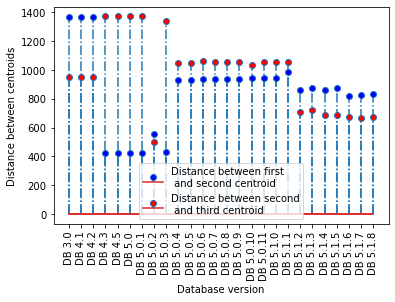

In [25]:
db_names = list()
for item in DRUGBANK_DATABASES:
    db_names.append(item[1])

markerline1, stemlines, _ = plt.stem(db_names,centroid_distance_1_2_list,'-.',label = "Distance between first\n and second centroid")
plt.setp(markerline1, 'markerfacecolor', 'b')
markerline2, stemlines, _ = plt.stem(db_names,centroid_distance_2_3_list, '-.',label = "Distance between second\n and third centroid")
plt.setp(markerline2, 'markerfacecolor', 'r')
plt.legend()
plt.xlabel("Database version")
plt.ylabel("Distance between centroids")
plt.xticks(db_names, [str(i) for i in db_names], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()